In [202]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


ok_wells = './resources/InjectionWells.csv'
ok_quakes = './resources/okQuakes.csv'

wells_df = pd.read_csv(ok_wells)
quakes_df = pd.read_csv(ok_quakes)



In [203]:
# Cleaning Data
wells_df.dropna()
wells_df.drop_duplicates()
quakes_df.dropna()
quakes_df.drop_duplicates()
# https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
wells_df = wells_df[wells_df.LAT !=0]
places = quakes_df["place"].unique()
quakes_df = quakes_df.loc[quakes_df['place'].str.contains("Oklahoma")]



In [204]:
# comparing 
print(len(quakes_df))
print(len(wells_df))


7854
11075


In [205]:
# round(quakes_df['latitude'],0)
quakes_df.rename(columns={'latitude':'lat'}, inplace=True)
# quakes_df['lat']= round(quakes_df['lat'],0)
quakes_df.rename(columns={'longitude':'lng'}, inplace=True)
# quakes_df['lng']= round(quakes_df['lng'],0)
# quakes_df

In [206]:
# round(wells_df["LAT"],0 )
wells_df.rename(columns={'LAT':'lat'}, inplace=True)
# wells_df['lat']=round(wells_df["lat"],0 )
wells_df.rename(columns={'LONG':'lng'}, inplace=True)
# wells_df['lng']=round(wells_df["lng"],0 )
# wells_df
# https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/
# rankings_pd.rename(columns = {'test':'TEST'}, inplace = True) 

In [207]:
# https://towardsdatascience.com/how-to-easily-join-data-by-location-in-python-spatial-join-197490ff3544
# https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
# import descartes

# from shapely.geometry import Point

# points_1= [ [x,y] for x,y in zip(wells_df['lat'],wells_df['lng'])]
# points= [ xy for xy in zip(wells_df['lat'],wells_df['lng'])]
# geo_df_1 = gpd.GeoDataFrame(wells_df, geometry=points )

# points_2= [ [x,y] for x,y in zip(quakes_df['lat'],quakes_df['lng'])]
# points= [ xy for xy in zip(quakes_df['lat'],quakes_df['lng'])]
# geo_df_2 = gpd.GeoDataFrame(quakes_df, geometry=points )

# wells_df['points'] = points_1
# quakes_df['points']= points_2
# are not unique????
# wells_df['points'].unique
# quakes_df['points'].unique

In [208]:
# # north oklahoma? 
# # EPSG:2267
# from shapely.geometry import Point

# # creating a geometry column 
# # geometry = [Point(xy) for xy in zip(cities['longitude'], cities['latitude'])]# Coordinate reference system : WGS84
# points= [ Point(xy) for xy in zip(wells_df['lat'],wells_df['lng'])]
# # points
# crs = {'init': 'epsg:4326'}# Creating a Geographic data frame 
# gdf = gpd.GeoDataFrame(wells_df, crs=crs, geometry=points)
# gdf.plot(marker='*', markersize=0.2)




In [209]:
# # wells_df[wells_df['lng'] == -195]

# pd.set_option('display.max_rows', None)
# import gmaps
# from api_keys import g_key
# gmaps.configure(api_key=g_key)


# locations = quakes_df[['lat','lng']]
# fig = gmaps.figure()

# # Create heat layer, with humidity as weight 
# heat_layer = gmaps.heatmap_layer(locations,  dissipating=True, max_intensity=10,point_radius=10)

# # # Add layer
# fig.add_layer(heat_layer)

# # wells_df=wells_df[1:-1]
# locations = wells_df[['lat','lng']].values.tolist()

# for i in range(len(locations)):
#     x = locations[i][0]
#     y = locations[i][1]
#     if(y<-180):
#         locations[i][1]=-180


# #         locations[x] = [0,0]
# #         print(locations[x,y])
        

# # wells_layer = gmaps.symbol_layer(locations, fill_color='blue', scale=2)

# # fig.add_layer(wells_layer)
# # fig
# wells_layer = gmaps.symbol_layer(locations, fill_color='blue', scale=2)
# # 68.8738292
# # -194.90751640000002 


# fig.add_layer(wells_layer)
# fig

In [210]:
import plotly_express as px

from api_key import mapbox_token

px.set_mapbox_access_token(mapbox_token)
fig = px.density_mapbox(quakes_df, lat='lat', lon='lng', z='mag', radius=10)
fig2 = px.scatter_mapbox(wells_df, lat="lat", lon="lng",color_discrete_sequence=["blue"], opacity=.5, zoom=1)


fig.add_trace(fig2.data[0])





In [211]:
# import pandas as pd
import geopandas as gpd

import scipy.stats as st
# import seaborn as sns
# corr = dataframe.corr()
# sns.heatmap(corr, 
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values)
            

# quakes_df.columns
gdf_quakes = gpd.GeoDataFrame(quakes_df,   geometry=gpd.points_from_xy(quakes_df.lng, quakes_df.lat))
gdf_wells = gpd.GeoDataFrame(wells_df, geometry=gpd.points_from_xy(wells_df.lng, wells_df.lat))
# gdf_wells
# gdf_quakes
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# correlation coefficient
# print(len(gdf_quakes))
# gdf_wells=gdf_wells[1:-((len(gdf_wells)-1)-len(gdf_quakes))]
# print(len(gdf_wells))


test_sjoin= gpd.sjoin(gdf_quakes, gdf_wells,how='left', op='intersects')
test_sjoin

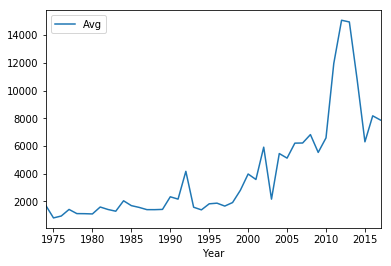

In [212]:
ok_inj_wells = 'resources/InjectionWells.csv'

ok_inj_wells_df = pd.read_csv(ok_inj_wells)
ok_inj_wells_df['BBLS'] =  [str(x).replace(',','') for x in ok_inj_wells_df['BBLS']]
ok_inj_wells_df['BBLS'] =  [str(x).replace('nan','0') for x in ok_inj_wells_df['BBLS']]
for x in range(len(ok_inj_wells_df['BBLS'])):
    try:
       ok_inj_wells_df['BBLS'][x]=int(ok_inj_wells_df['BBLS'][x])
    except:
       ok_inj_wells_df['BBLS'][x]=0
len(ok_inj_wells_df['BBLS'])



#print(ok_inj_wells_df['Approval Date'].dtype)

ok_inj_wells_df['Approval Date'] = pd.to_datetime(ok_inj_wells_df['Approval Date'])

#print (ok_inj_wells_df['Approval Date'].dtype)

ok_inj_wells_df['year'] = ok_inj_wells_df['Approval Date'].dt.year

wells = ok_inj_wells_df

wells_by_year = pd.DataFrame(wells.groupby('year'))

yearly_avg = []
for x in wells_by_year[1]:
    yearly_avg.append(x['BBLS'].mean())


years= [int(x) for x in wells_by_year[0]]
# type(wells_by_year[0]
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
yearly_bbls_df = pd.DataFrame(list(zip(years, yearly_avg)), 
               columns =['Year', 'Avg']) 



# yearly_bbls_df.plot.line()

yearly_bbls_df = yearly_bbls_df[yearly_bbls_df['Year'] >=1974]

yearly_bbls_df = yearly_bbls_df.set_index('Year')
yearly_bbls_df.plot.line()

# https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/




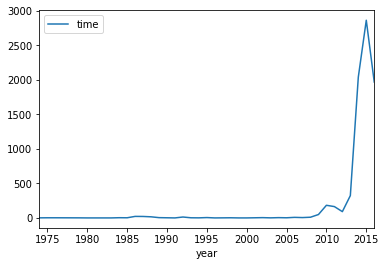

In [213]:

quakes_df['year'] = pd.to_datetime(quakes_df['time'])
quakes_df['year'] = quakes_df['year'].dt.year
yearly_quakes=pd.DataFrame(quakes_df.groupby('year').count())





yearly_quake_count_df = pd.DataFrame(yearly_quakes['time']) #random col for counts
yearly_quake_count_df.plot.line()




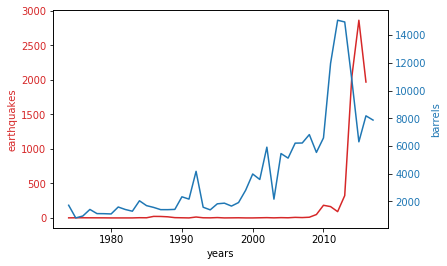

In [214]:


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('years')
ax1.set_ylabel('earthquakes', color=color)
ax1.plot(yearly_quake_count_df, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('barrels', color=color)  # we already handled the x-label with ax1
ax2.plot(yearly_bbls_df, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.savefig('earthquakes_vs_avg _barrels.png', bbox_inches="tight")

In [215]:
# print(len(yearly_quake_count_df))

# ensuring they are of equal length
yearly_bbls_df=yearly_bbls_df[1:-((len(yearly_bbls_df)-1)-len(yearly_quake_count_df))]

# print(len(yearly_bbls_df))

# 'time' is an arbitrary col that was used after a group by, to simply count the values in each year
correlation = st.pearsonr(yearly_quake_count_df['time'], yearly_bbls_df['Avg'])
print(f"The correlation between both factors is {round(correlation[0],2)}")



40
40
The correlation between both factors is 0.81


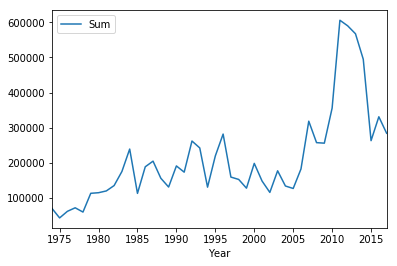

In [216]:

ok_inj_wells_df['PSI'] =  [str(x).replace(',','') for x in ok_inj_wells_df['PSI']]
ok_inj_wells_df['PSI'] =  [str(x).replace('nan','0') for x in ok_inj_wells_df['PSI']]
ok_inj_wells_df['PSI'] =  [str(x).replace('NaN','0') for x in ok_inj_wells_df['PSI']]
for x in range(len(ok_inj_wells_df['PSI'])):
    try:
       ok_inj_wells_df['PSI'][x]=int(ok_inj_wells_df['PSI'][x])
    except:
       ok_inj_wells_df['PSI'][x]=0
len(ok_inj_wells_df['PSI'])


ok_inj_wells_df['Approval Date'] = pd.to_datetime(ok_inj_wells_df['Approval Date'])
ok_inj_wells_df['year'] = ok_inj_wells_df['Approval Date'].dt.year
wells = ok_inj_wells_df
wells_by_year = pd.DataFrame(wells.groupby('year'))
yearly_psi_sums = []
for x in wells_by_year[1]:
    yearly_psi_sums.append(x['PSI'].sum())

years= [int(x) for x in wells_by_year[0]]
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
yearly_psi_df = pd.DataFrame(list(zip(years, yearly_psi_sums)), 
               columns =['Year', 'Sum']) 

yearly_psi_df = yearly_psi_df[yearly_psi_df['Year'] >=1974]
yearly_psi_df = yearly_psi_df.set_index('Year')
yearly_psi_df.plot.line()




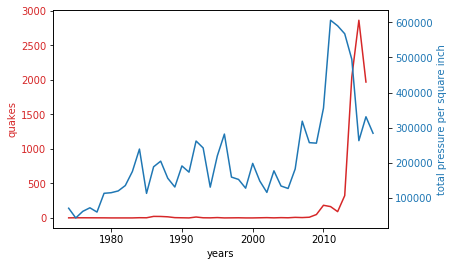

In [217]:


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('years')
ax1.set_ylabel('quakes', color=color)
ax1.plot(yearly_quake_count_df, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('total pressure per square inch', color=color)  # we already handled the x-label with ax1
ax2.plot(yearly_psi_df, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.savefig("quakes_vs_psi.png",bbox_inches="tight")